# Imports and Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (15, 5)

# Load Data

In [2]:
transactions_df = pd.read_csv("/Users/varunrao/Desktop/H&M RecSys Project/h-and-m-personalized-fashion-recommendations/transactions_train.csv")
articles_df = pd.read_csv("/Users/varunrao/Desktop/H&M RecSys Project/h-and-m-personalized-fashion-recommendations/articles.csv")
customers_df = pd.read_csv("/Users/varunrao/Desktop/H&M RecSys Project/h-and-m-personalized-fashion-recommendations/customers.csv")

In [3]:
# Let's convert back to parquet and load it in parquet format

transactions_df.to_parquet('transactions_parquet.parquet')
articles_df.to_parquet('articles_parquet.parquet')
customers_df.to_parquet('customers_parquet.parquet')

In [4]:
# Read the parquet data

transactions = pd.read_parquet('./transactions_parquet.parquet')
articles = pd.read_parquet('./articles_parquet.parquet')
customers = pd.read_parquet('./customers_parquet.parquet')

# Transactions EDA

In [5]:
transactions.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


In [6]:
transactions.shape

(31788324, 5)

In [7]:
transactions.dtypes

t_dat                object
customer_id          object
article_id            int64
price               float64
sales_channel_id      int64
dtype: object

In [8]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31788324 entries, 0 to 31788323
Data columns (total 5 columns):
 #   Column            Dtype  
---  ------            -----  
 0   t_dat             object 
 1   customer_id       object 
 2   article_id        int64  
 3   price             float64
 4   sales_channel_id  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.2+ GB


In [9]:
transactions.describe()

,article_id,price,sales_channel_id
count,3.178832e+07,3.178832e+07,3.178832e+07
mean,6.962272e+08,2.782927e-02,1.704028e+00
std,1.334480e+08,1.918113e-02,4.564786e-01
min,1.087750e+08,1.694915e-05,1.000000e+00
25%,6.328030e+08,1.581356e-02,1.000000e+00
50%,7.145820e+08,2.540678e-02,2.000000e+00
75%,7.865240e+08,3.388136e-02,2.000000e+00
max,9.562170e+08,5.915254e-01,2.000000e+00


In [10]:
print(transactions.isnull().sum())

t_dat               0
customer_id         0
article_id          0
price               0
sales_channel_id    0
dtype: int64


In [11]:
def convert_to_date(s):
    dates = {date:datetime.datetime.strptime(date,'%Y-%m-%d') for date in s.unique()}
    return s.map(dates)

In [12]:
transactions['t_dat'] = convert_to_date(transactions['t_dat'])

In [13]:
transactions.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


In [14]:
transactions.dtypes

t_dat               datetime64[ns]
customer_id                 object
article_id                   int64
price                      float64
sales_channel_id             int64
dtype: object

In [15]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31788324 entries, 0 to 31788323
Data columns (total 5 columns):
 #   Column            Dtype         
---  ------            -----         
 0   t_dat             datetime64[ns]
 1   customer_id       object        
 2   article_id        int64         
 3   price             float64       
 4   sales_channel_id  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 1.2+ GB


In [16]:
transactions['customer_id'].nunique()

1362281

In [17]:
transactions['article_id'].nunique()

104547

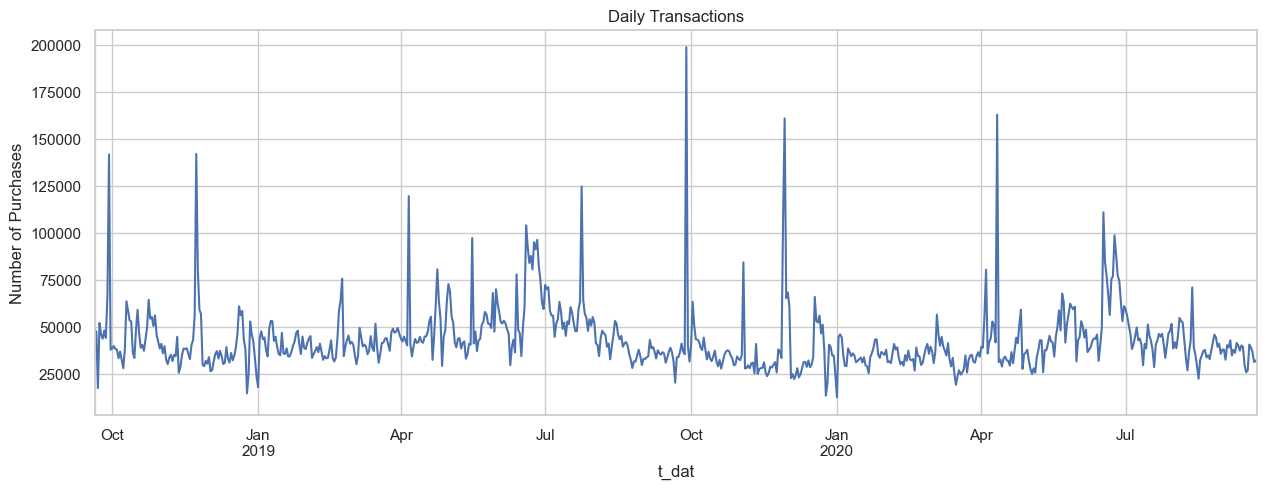

In [18]:
# Daily transaction count
daily_counts = transactions.groupby('t_dat').size()
daily_counts.plot(title='Daily Transactions')
plt.ylabel('Number of Purchases')
plt.show()

#### 1. Strong weekly/seasonal spikes
- There are sharp transaction peaks scattered throughout the timeline, often in repeating patterns.
- These spikes likely correspond to sales campaigns, new product drops, or holiday shopping events (e.g., Black Friday, Christmas, summer sales).

#### 2. Significant year-end sales activity
- Around late November and December both in 2018 and 2019, there’s a dramatic rise in purchases.
- This is consistent with Black Friday (late November) and Christmas/New Year sales.

#### 3. Mid-year bumps
- Noticeable June/July spikes may be tied to mid-year clearance sales or summer promotions.

#### 4. Transaction dips
- Several periods show sudden drops to near-zero or low volumes, especially:
- Around the end of December to early January — possibly fewer purchases post-holiday or data collection gaps.
- Occasional small troughs in other months that could be system downtimes, public holidays, or reporting lags.

In [19]:
min_date = transactions['t_dat'].min()
max_date = transactions['t_dat'].max()

print(f"Date Range in `t_dat`:")
print(f"Start Date (Earliest): {min_date}")
print(f"End Date (Latest):     {max_date}")

Date Range in `t_dat`:
Start Date (Earliest): 2018-09-20 00:00:00
End Date (Latest):     2020-09-22 00:00:00


In [20]:
date_range = max_date - min_date
print(f"Total Time Span: {date_range.days} days")

Total Time Span: 733 days


In [21]:
# Create year and month columns
transactions['year'] = transactions['t_dat'].dt.year
transactions['month'] = transactions['t_dat'].dt.month

In [22]:
# Group by year and month
monthly_counts = transactions.groupby(['year', 'month']).size().reset_index(name='transaction_count')

# Sort for display
monthly_counts = monthly_counts.sort_values(['year', 'month'])

print(monthly_counts)

    year  month  transaction_count
0   2018      9             594776
1   2018     10            1397040
2   2018     11            1270619
3   2018     12            1148827
4   2019      1            1263471
5   2019      2            1152412
6   2019      3            1286750
7   2019      4            1476454
8   2019      5            1560319
9   2019      6            1906202
10  2019      7            1807494
11  2019      8            1253530
12  2019      9            1227178
13  2019     10            1146772
14  2019     11            1198033
15  2019     12            1118315
16  2020      1            1076354
17  2020      2            1001859
18  2020      3            1047752
19  2020      4            1340882
20  2020      5            1361815
21  2020      6            1764507
22  2020      7            1351502
23  2020      8            1237192
24  2020      9             798269


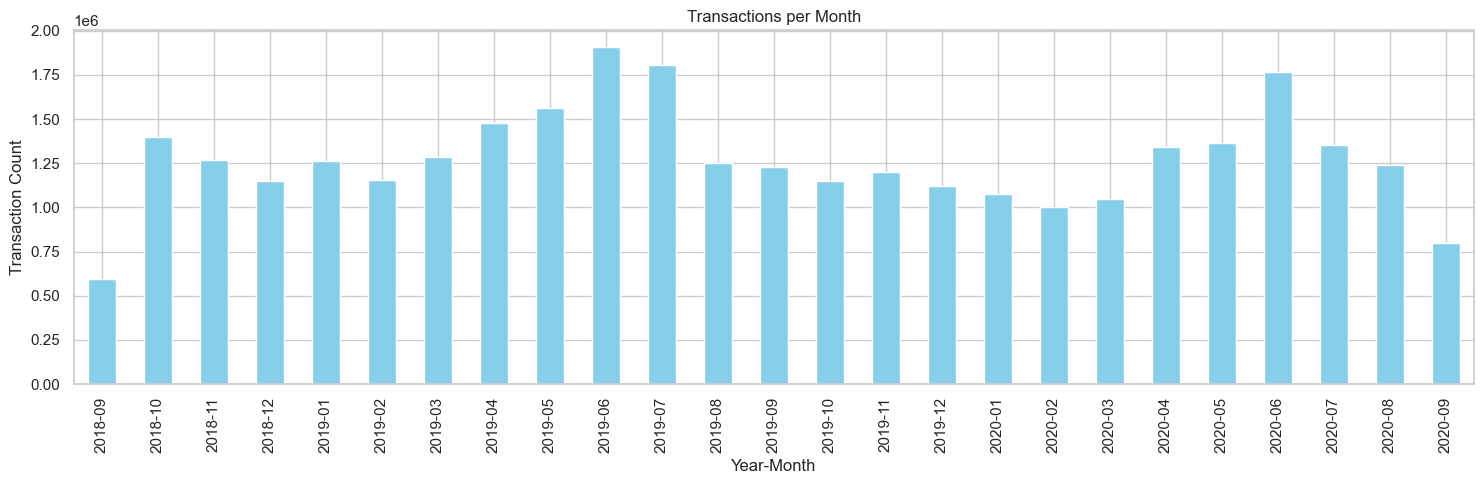

In [23]:
# Create a combined "YYYY-MM" string column for x-axis

transactions['year_month'] = transactions['t_dat'].dt.to_period('M').astype(str)

monthly_totals = transactions.groupby('year_month').size()

monthly_totals.plot(kind='bar', color='skyblue')
plt.title("Transactions per Month")
plt.xlabel("Year-Month")
plt.ylabel("Transaction Count")
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

### 1. Clear seasonal patterns
- Mid-year peaks are prominent in both 2019 (June–July) and 2020 (June).
- These could correspond to summer sales or mid-year clearance campaigns.
- October 2018 also shows a sharp rise likely an early campaign or autumn launch.

### 2. June 2019 is the all-time high
- June 2019 stands out with nearly 1.9 million transactions, the highest in the entire period.
- This was immediately followed by July 2019 with slightly lower but still very high sales (~1.8M).

### 3. Year-over-year trends
- June 2020 again spikes strongly (~1.75M transactions), suggesting recurring promotional events during this month.
- Compared to 2019, some months in 2020 (e.g., Jan–Mar) have noticeably lower volumes potentially due to seasonality or external factors like COVID-19 lockdowns affecting sales.

### 4. Declines after big sales months
- Post-June/July peaks, there's a visible dip in August both years possibly because customers purchase heavily during sales and slow down afterward.
- Similarly, early 2020 shows a gradual decline after April until the June spike.

### 5. Lower transaction months
- February 2020 and September 2020 are among the lowest months in this range.
- These could be off-season periods with fewer promotions.

### 6. Marketing implication
- June consistently performs extremely well — ideal timing for major campaigns.
- October, April, and May also see above-average sales, making them good secondary promotion windows.

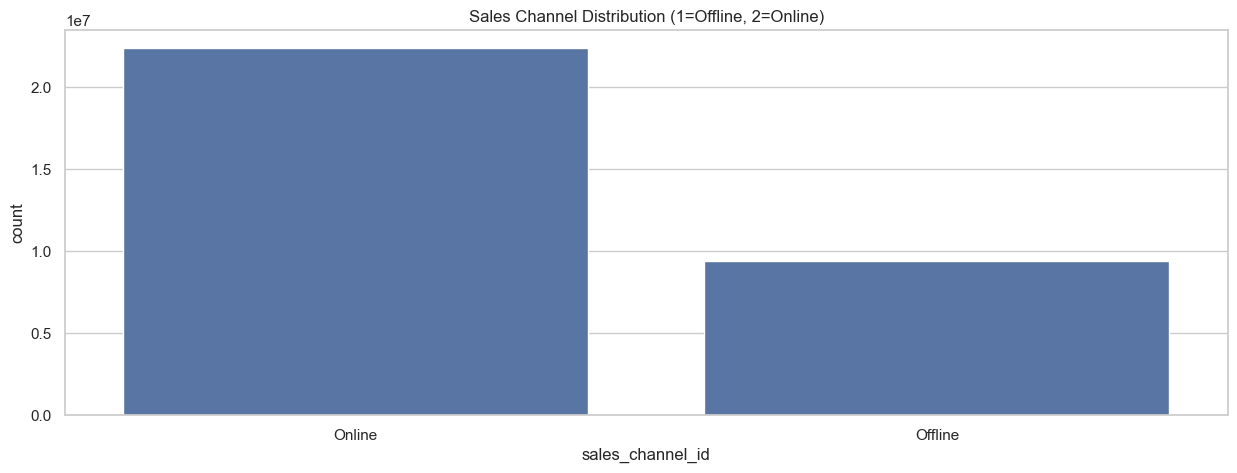

In [27]:
sns.countplot(data=transactions, x='sales_channel_id')
plt.title("Sales Channel Distribution (1=Offline, 2=Online)")
plt.show()

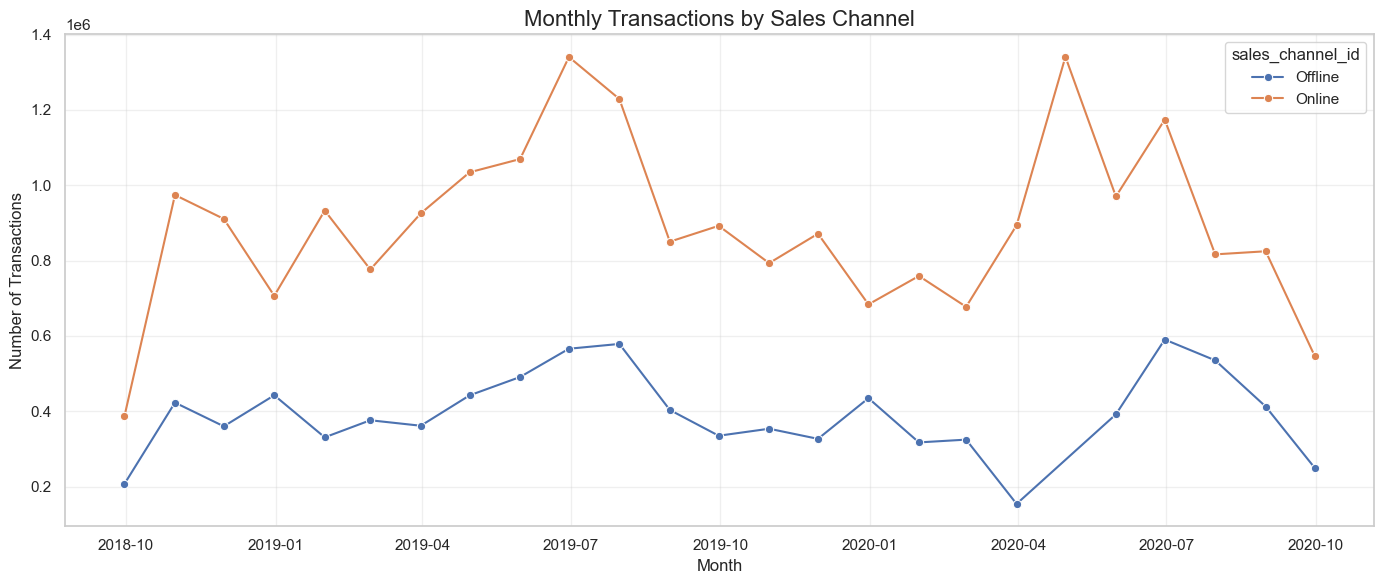

In [25]:
# Group by month and sales_channel_id
monthly_channel = (
    transactions
    .groupby([pd.Grouper(key="t_dat", freq="ME"), "sales_channel_id"])
    .size()
    .reset_index(name="transaction_count")
)

# Map channel labels
channel_map = {1: "Offline", 2: "Online"}
monthly_channel["sales_channel_id"] = monthly_channel["sales_channel_id"].map(channel_map)

# Plot
plt.figure(figsize=(14,6))
sns.lineplot(
    data=monthly_channel,
    x="t_dat",
    y="transaction_count",
    hue="sales_channel_id",
    marker="o"
)
plt.title("Monthly Transactions by Sales Channel", fontsize=16)
plt.xlabel("Month")
plt.ylabel("Number of Transactions")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### 1. Online dominates sales
- Online transactions are consistently 2×–3× higher than offline transactions.
- This confirms that the customer base is heavily digital-first, possibly due to H&M's strong e-commerce presence.

### 2. Seasonal peaks are visible
- Both online and offline channels show recurring summer peaks (June–July in 2019 and 2020).
- These likely align with summer sales campaigns and seasonal clothing launches.
- A smaller spike is also seen in October 2018 and April 2020.

### 3️. Sharp drop in April 2020
- Both channels show a steep drop in April 2020 — this likely corresponds to COVID-19 lockdowns disrupting retail and supply chains.
- Offline sales were more severely impacted than online during this period.

### 4️. Post-pandemic recovery
- After the April 2020 drop, both channels rebound quickly, with online returning to pre-drop levels faster than offline.
- Offline peaks in July 2020 almost match pre-COVID highs, suggesting pent-up demand when stores reopened.

### 5️. Offline channel has smaller fluctuations
- Offline sales remain relatively stable with modest seasonal peaks, whereas online sales show more pronounced spikes and dips — possibly due to online marketing campaigns and flash sales.

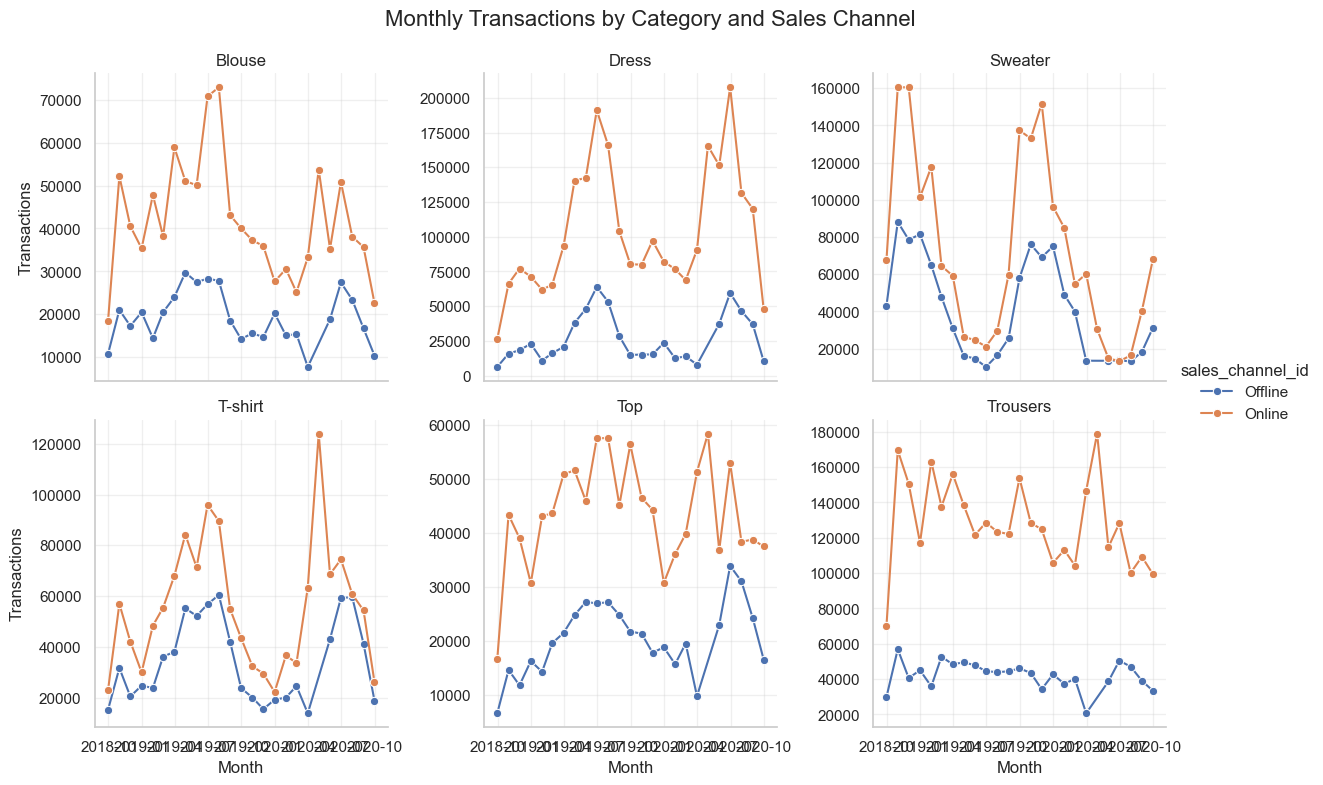

In [26]:
# Merge to bring product_type_name into transactions
transactions = transactions.merge(
    articles[["article_id", "product_type_name"]],
    on="article_id",
    how="left"
)

# Map channel labels
channel_map = {1: "Offline", 2: "Online"}
transactions["sales_channel_id"] = transactions["sales_channel_id"].map(channel_map)

# Group by month, category, and channel
monthly_cat_channel = (
    transactions
    .groupby([
        pd.Grouper(key="t_dat", freq="ME"),
        "product_type_name",
        "sales_channel_id"
    ])
    .size()
    .reset_index(name="transaction_count")
)

# Get top categories overall
top_categories = (
    transactions["product_type_name"]
    .value_counts()
    .head(6)  # top 6 categories to avoid clutter
    .index
)

# Filter only top categories
monthly_cat_channel = monthly_cat_channel[
    monthly_cat_channel["product_type_name"].isin(top_categories)
]

# Plot
g = sns.FacetGrid(
    monthly_cat_channel,
    col="product_type_name",
    hue="sales_channel_id",
    col_wrap=3,
    height=4,
    sharey=False
)
g.map(sns.lineplot, "t_dat", "transaction_count", marker="o")
g.add_legend()
g.set_titles("{col_name}")
g.set_axis_labels("Month", "Transactions")
for ax in g.axes.flat:
    ax.grid(alpha=0.3)

plt.subplots_adjust(top=0.9)
g.fig.suptitle("Monthly Transactions by Category and Sales Channel", fontsize=16)
plt.show()

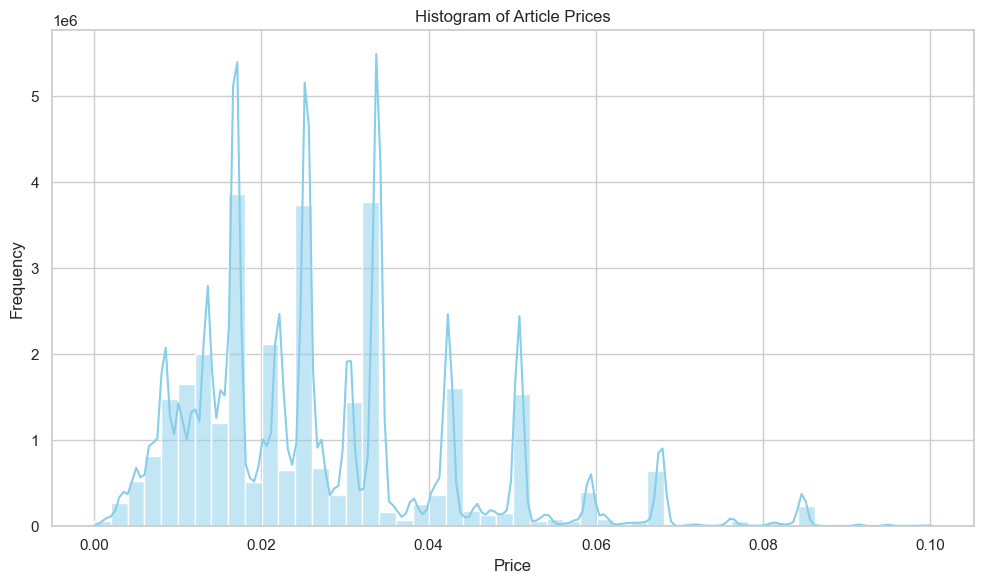

In [102]:
# Optional: Remove outliers (e.g., top 1%) for clearer plot
price_cap = transactions["price"].quantile(0.99)
filtered_prices = transactions[transactions["price"] <= price_cap]["price"]

# Plot
plt.figure(figsize=(10, 6))
sns.histplot(filtered_prices, bins=50, kde=True, color="skyblue")
plt.title("Histogram of Article Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Count how many times each user bought each article

user_article_counts = (
    transactions.groupby(['customer_id', 'article_id'])
    .size()
    .reset_index(name='purchase_count')
)

In [80]:
# Mark user-article as "only once"
user_article_counts['only_once'] = user_article_counts['purchase_count'] == 1

# Group by article: total buyers and one-time buyers
article_return_proxy = (
    user_article_counts
    .groupby('article_id')
    .agg(
        total_buyers=('customer_id', 'count'),
        one_time_buyers=('only_once', 'sum')
    )
    .reset_index()
)

# Add estimated return rate
article_return_proxy['return_rate_est'] = article_return_proxy['one_time_buyers'] / article_return_proxy['total_buyers']

In [81]:
# Example: Flag if return rate > 40%
article_return_proxy['high_return_flag'] = article_return_proxy['return_rate_est'] > 0.4

In [85]:
top_returns = article_return_proxy.sort_values('return_rate_est', ascending=False).head(50)
print(top_returns[['article_id', 'return_rate_est', 'total_buyers', 'one_time_buyers']])

        article_id  return_rate_est  total_buyers  one_time_buyers
104509   944131001              1.0             2                2
65868    746292002              1.0            33               33
65869    746292003              1.0             5                5
104508   944000001              1.0             9                9
104491   942596001              1.0            36               36
104490   942506001              1.0             1                1
104504   943060001              1.0            12               12
104537   948152002              1.0             3                3
104485   942194001              1.0             2                2
65873    746295003              1.0             9                9
65876    746296004              1.0             8                8
65878    746296007              1.0             1                1
65831    746144009              1.0            11               11
65832    746144011              1.0             3             

In [28]:
# Group by customer and date → count number of items in each purchase
basket_sizes = (
    transactions.groupby(["customer_id", "t_dat"])["article_id"]
    .count()
    .reset_index(name="basket_size")
)

# Average basket size across all transactions
avg_basket_size = basket_sizes["basket_size"].mean()

print(f"Average basket size per transaction: {avg_basket_size:.2f} items")

Average basket size per transaction: 3.50 items


# Articles EDA

In [74]:
articles.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [77]:
articles.shape

(105542, 25)

In [78]:
articles.dtypes

article_id                       int64
product_code                     int64
prod_name                       object
product_type_no                  int64
product_type_name               object
product_group_name              object
graphical_appearance_no          int64
graphical_appearance_name       object
colour_group_code                int64
colour_group_name               object
perceived_colour_value_id        int64
perceived_colour_value_name     object
perceived_colour_master_id       int64
perceived_colour_master_name    object
department_no                    int64
department_name                 object
index_code                      object
index_name                      object
index_group_no                   int64
index_group_name                object
section_no                       int64
section_name                    object
garment_group_no                 int64
garment_group_name              object
detail_desc                     object
dtype: object

In [96]:
articles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105542 entries, 0 to 105541
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   article_id                    105542 non-null  int64 
 1   product_code                  105542 non-null  int64 
 2   prod_name                     105542 non-null  object
 3   product_type_no               105542 non-null  int64 
 4   product_type_name             105542 non-null  object
 5   product_group_name            105542 non-null  object
 6   graphical_appearance_no       105542 non-null  int64 
 7   graphical_appearance_name     105542 non-null  object
 8   colour_group_code             105542 non-null  int64 
 9   colour_group_name             105542 non-null  object
 10  perceived_colour_value_id     105542 non-null  int64 
 11  perceived_colour_value_name   105542 non-null  object
 12  perceived_colour_master_id    105542 non-null  int64 
 13 

In [97]:
articles.describe()

,article_id,product_code,product_type_no,graphical_appearance_no,colour_group_code,perceived_colour_value_id,perceived_colour_master_id,department_no,index_group_no,section_no,garment_group_no
count,1.055420e+05,105542.000000,105542.000000,1.055420e+05,105542.000000,105542.000000,105542.000000,105542.000000,105542.000000,105542.000000,105542.000000
mean,6.984246e+08,698424.563378,234.861875,1.009515e+06,32.233822,3.206183,7.807972,4532.777833,3.171534,42.664219,1010.438290
std,1.284624e+08,128462.384432,75.049308,2.241359e+04,28.086154,1.563839,5.376727,2712.692011,4.353234,23.260105,6.731023
min,1.087750e+08,108775.000000,-1.000000,-1.000000e+00,-1.000000,-1.000000,-1.000000,1201.000000,1.000000,2.000000,1001.000000
25%,6.169925e+08,616992.500000,252.000000,1.010008e+06,9.000000,2.000000,4.000000,1676.000000,1.000000,20.000000,1005.000000
50%,7.022130e+08,702213.000000,259.000000,1.010016e+06,14.000000,4.000000,5.000000,4222.000000,2.000000,46.000000,1009.000000
75%,7.967030e+08,796703.000000,272.000000,1.010016e+06,52.000000,4.000000,11.000000,7389.000000,4.000000,61.000000,1017.000000
max,9.594610e+08,959461.000000,762.000000,1.010029e+06,93.000000,7.000000,20.000000,9989.000000,26.000000,97.000000,1025.000000


In [95]:
print(articles.isnull().sum())

article_id                        0
product_code                      0
prod_name                         0
product_type_no                   0
product_type_name                 0
product_group_name                0
graphical_appearance_no           0
graphical_appearance_name         0
colour_group_code                 0
colour_group_name                 0
perceived_colour_value_id         0
perceived_colour_value_name       0
perceived_colour_master_id        0
perceived_colour_master_name      0
department_no                     0
department_name                   0
index_code                        0
index_name                        0
index_group_no                    0
index_group_name                  0
section_no                        0
section_name                      0
garment_group_no                  0
garment_group_name                0
detail_desc                     416
dtype: int64


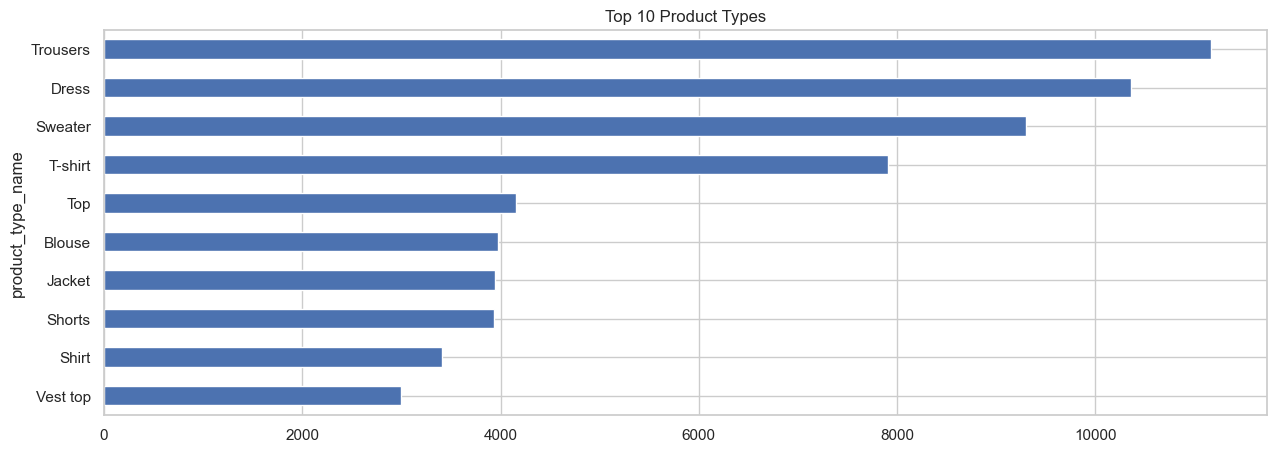

In [65]:
# Top product categories

top_cats = articles['product_type_name'].value_counts().head(10)
top_cats.plot(kind='barh', title='Top 10 Product Types')
plt.gca().invert_yaxis()
plt.show()

# Customers EDA

In [75]:
customers.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


In [69]:
customers.shape

(1371980, 7)

In [76]:
customers.dtypes

customer_id                object
FN                        float64
Active                    float64
club_member_status         object
fashion_news_frequency     object
age                       float64
postal_code                object
dtype: object

In [115]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371980 entries, 0 to 1371979
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   customer_id             1371980 non-null  object 
 1   FN                      476930 non-null   float64
 2   Active                  464404 non-null   float64
 3   club_member_status      1365918 non-null  object 
 4   fashion_news_frequency  1355969 non-null  object 
 5   age                     1356119 non-null  float64
 6   postal_code             1371980 non-null  object 
dtypes: float64(3), object(4)
memory usage: 73.3+ MB


In [116]:
print(customers.isnull().sum())

customer_id                    0
FN                        895050
Active                    907576
club_member_status          6062
fashion_news_frequency     16011
age                        15861
postal_code                    0
dtype: int64


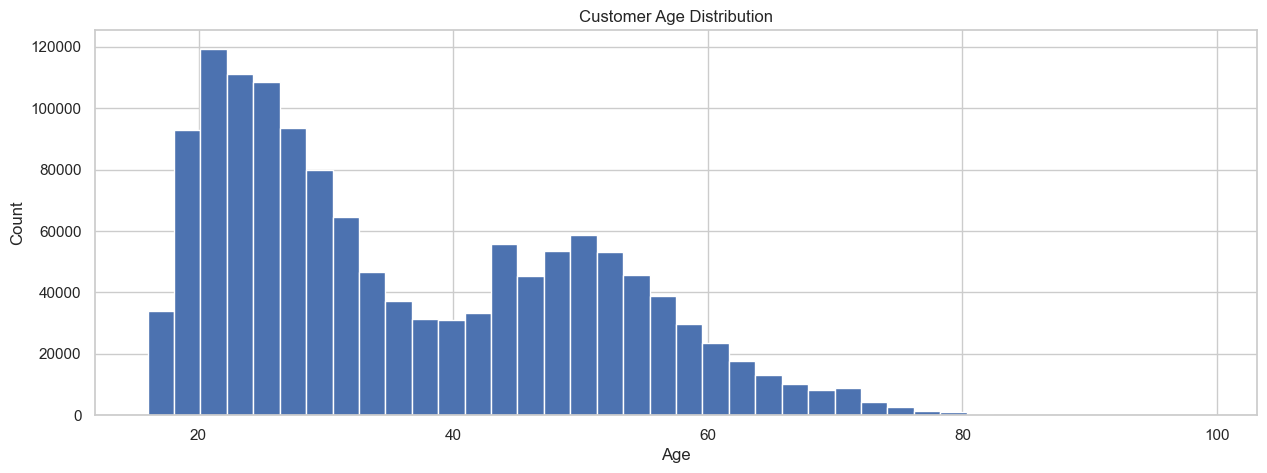

In [66]:
# Age distribution

customers['age'].hist(bins=40)
plt.title('Customer Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

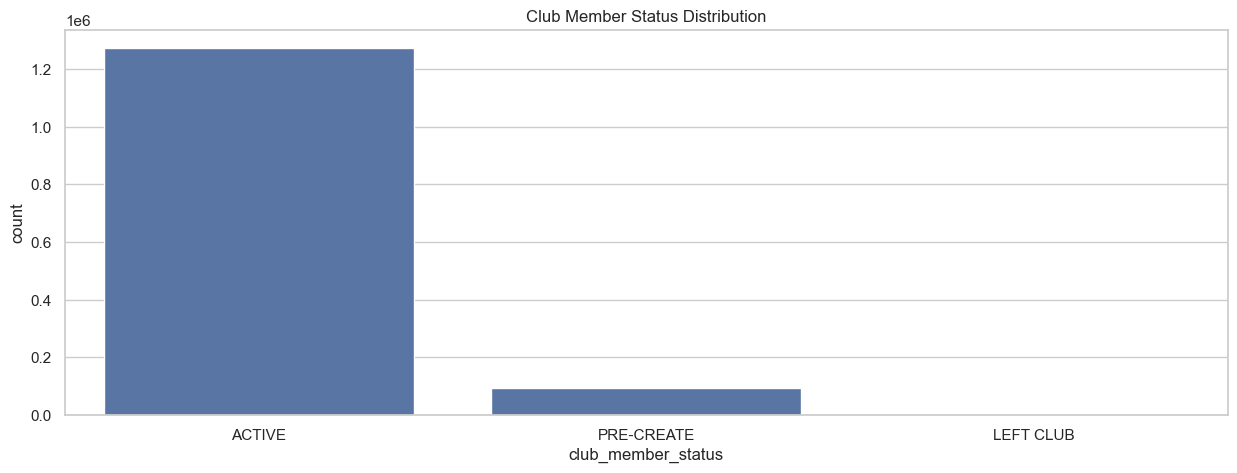

In [67]:
# Club membership

sns.countplot(x='club_member_status', data=customers)
plt.title("Club Member Status Distribution")
plt.show()

In [103]:
df = transactions.merge(customers[['customer_id', 'fashion_news_frequency']], on='customer_id', how='left')

In [104]:
# Normalize values for clarity

df['fashion_news_frequency'] = df['fashion_news_frequency'].replace({
    'None': 'None',
    'None (deleted)': 'None',
    'Regularly': 'Regularly',
    'Monthly': 'Monthly'
})

In [111]:
# How many customers fall into each category?
customer_freq = customers['fashion_news_frequency'].value_counts()
print(customer_freq)

fashion_news_frequency
NONE         877711
Regularly    477416
Monthly         842
Name: count, dtype: int64


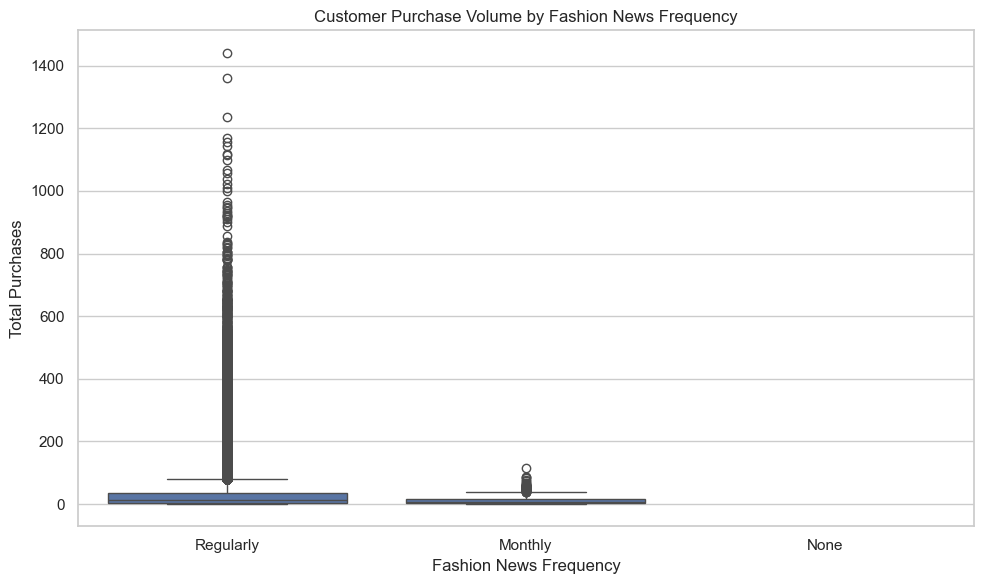

In [106]:
# Aggregate purchase count per customer
customer_purchase = df.groupby('customer_id').agg(
    total_purchases=('article_id', 'count'),
    total_spent=('price', 'sum')
).reset_index()

# Merge with customer metadata
customer_purchase = customer_purchase.merge(customers[['customer_id', 'fashion_news_frequency']], on='customer_id')

# Plot total purchases by marketing group
plt.figure(figsize=(10, 6))
sns.boxplot(data=customer_purchase, x='fashion_news_frequency', y='total_purchases', order=['Regularly', 'Monthly', 'None'])
plt.title("Customer Purchase Volume by Fashion News Frequency")
plt.xlabel("Fashion News Frequency")
plt.ylabel("Total Purchases")
plt.tight_layout()
plt.show()

In [117]:
# Find the last transaction date in the dataset
max_date = transactions['t_dat'].max()
cutoff_date = max_date - pd.Timedelta(days=30)

# Customers who purchased in the last 30 days → Active
active_users = transactions.loc[transactions['t_dat'] >= cutoff_date, 'customer_id'].unique()

# All customers in the dataset
all_customers = transactions['customer_id'].unique()

# Inactive = Not in active list
inactive_users = set(all_customers) - set(active_users)

# Count them
print("Active users:", len(active_users))
print("Inactive users:", len(inactive_users))

Active users: 250619
Inactive users: 1111662


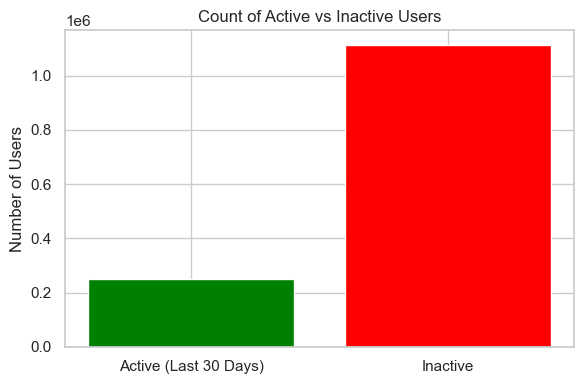

In [118]:
counts = [len(active_users), len(inactive_users)]
labels = ['Active (Last 30 Days)', 'Inactive']

plt.figure(figsize=(6, 4))
plt.bar(labels, counts, color=['green', 'red'])
plt.title('Count of Active vs Inactive Users')
plt.ylabel('Number of Users')
plt.tight_layout()
plt.show()

# Cross Analysis


In [68]:
# Merging DataFrames by joining transaction with article & customer data

merged = transactions.merge(articles, on='article_id', how='left')
merged = merged.merge(customers, on='customer_id', how='left')

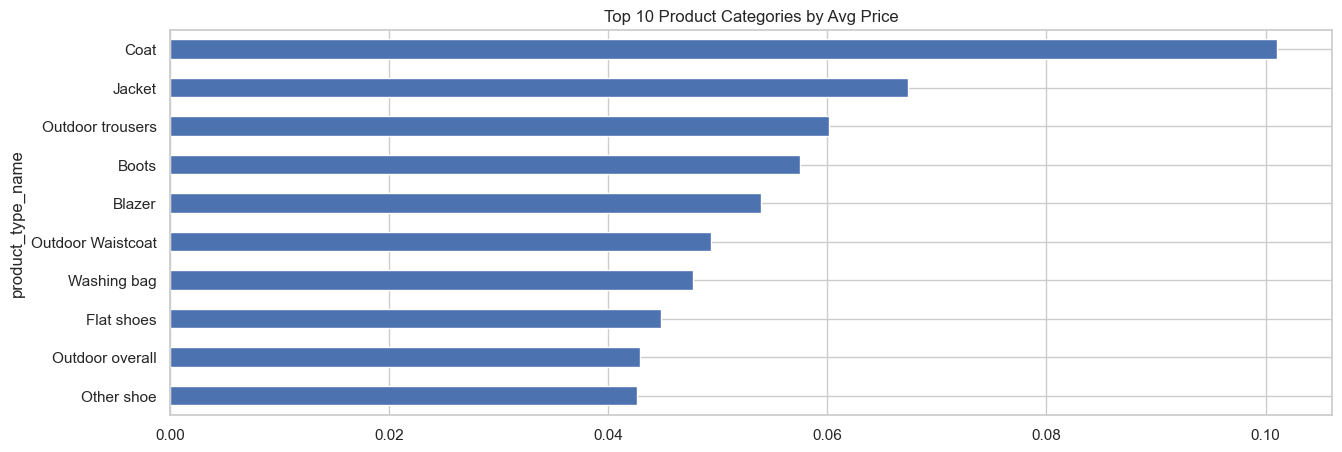

In [70]:
# Average price per product category

cat_price = merged.groupby('product_type_name')['price'].mean().sort_values(ascending=False).head(10)
cat_price.plot(kind='barh', title='Top 10 Product Categories by Avg Price')
plt.gca().invert_yaxis()
plt.show()

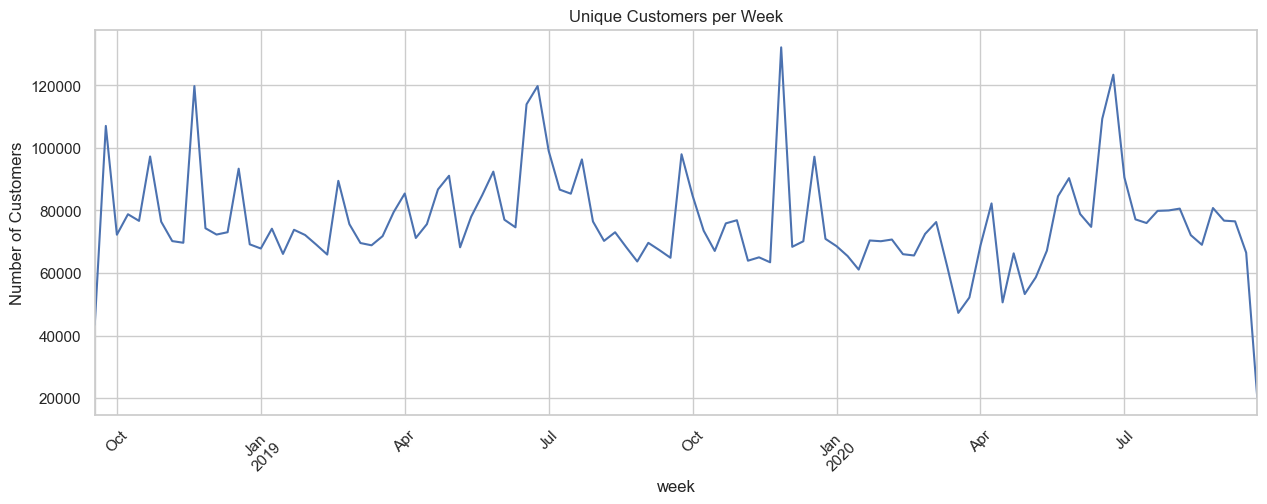

In [ ]:
# Time-based customer trends

weekly = transactions.copy()
weekly['week'] = weekly['t_dat'].dt.to_period('W')
weekly_counts = weekly.groupby(['week'])['customer_id'].nunique()
weekly_counts.plot(title='Unique Customers per Week')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Convert date to date object
transactions["date"] = pd.to_datetime(transactions["t_dat"]).dt.date

# Extract product name
df_plot = transactions.merge(articles[["article_id", "prod_name"]],\
     how='left', on=None, left_on='article_id', right_on='article_id', suffixes=('_x', '_y'))

# Calculate the order of the transcation per customer
order_number = df_plot[["date", "customer_id"]].groupby(["date", "customer_id"]).count()
order_number.reset_index(["date", "customer_id"], inplace=True)

order_number['nth_order'] = order_number.sort_values(["customer_id",'date'], ascending=True)\
             .groupby(['customer_id'])\
             .cumcount() + 1
order_number.loc[order_number["customer_id"]=="000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318",:]

# Join transaction with order of transaction from previous step
df_plot = df_plot.merge(order_number[["date", "customer_id", "nth_order"]],\
     how='left', on=None, left_on=["date", "customer_id"], right_on=["date", "customer_id"], suffixes=('_x', '_y'))

# prepare data for eda
df_plot["flag"] = 1

y_channel= df_plot[["date","sales_channel_id", "customer_id","flag"]]\
    .groupby(["date","sales_channel_id", "customer_id"]).max("flag")
y_channel.reset_index(level="sales_channel_id", inplace=True)

y_channel_2= df_plot.groupby(["date","sales_channel_id"]).agg({"customer_id": lambda num: num.nunique()}) #total price per customer
y_channel_2.columns = ['nb_visitors']
y_channel_2.reset_index(level=["date","sales_channel_id"], inplace=True)

In [33]:
# placeholders for min and max of the axis
xmin = y_channel_2["date"].min()
xmax = y_channel_2["date"].max()

ymin = y_channel_2["nb_visitors"].min() - 1000
ymax = y_channel_2["nb_visitors"].max() + 1000

findfont: Font family 'italic' not found.
findfont: Font family 'italic' not found.
findfont: Font family 'italic' not found.
findfont: Font family 'italic' not found.
findfont: Font family 'italic' not found.
findfont: Font family 'italic' not found.
findfont: Font family 'italic' not found.
findfont: Font family 'italic' not found.


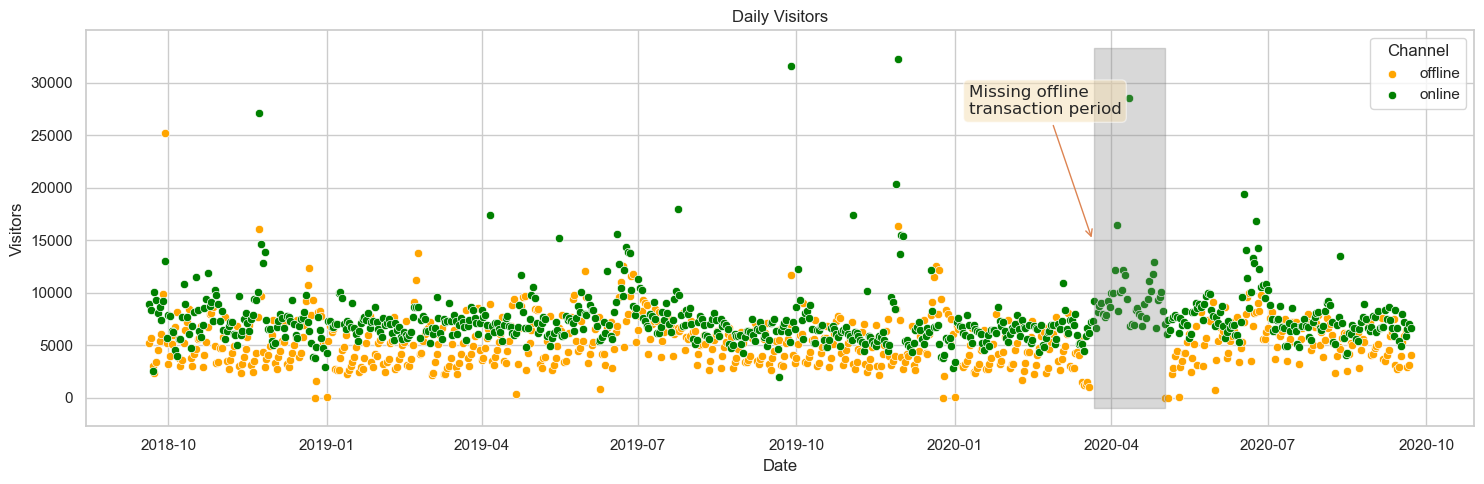

In [41]:
# Set up figure and axis
fig, ax = plt.subplots(figsize=(15, 5))  # Adjust size as needed

# Scatter plots for offline and online channels
sns.scatterplot(
    data=y_channel_2.loc[y_channel_2["sales_channel_id"] == 1],
    x="date", y="nb_visitors", color='orange', label="offline", ax=ax
)
sns.scatterplot(
    data=y_channel_2.loc[y_channel_2["sales_channel_id"] == 2],
    x="date", y="nb_visitors", color='green', label="online", ax=ax
)

# Label formatting
ax.set_title('Daily Visitors')
ax.set_xlabel("Date")
ax.set_ylabel("Visitors")
ax.ticklabel_format(style='plain', useOffset=False, axis='y')
ax.legend(title="Channel")

# Highlight missing period
ax.fill_betweenx([ymin, ymax], 18343, 18384, color="gray", alpha=0.3)

# Annotation box
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.annotate(
    "Missing offline \ntransaction period",
    xy=(18342, 15000), xytext=(18270, 27000),
    arrowprops={"arrowstyle": "->", "color": "C1"},
    bbox=props,
    fontproperties='italic'
)

plt.tight_layout()
plt.show()

# RFM Analysis

In [89]:
transactions['article_id'] = transactions['article_id'].astype(str)

In [90]:
# Reference point for calculating Recency

last_date = transactions['t_dat'].max()
print("Last transaction date:", last_date)

Last transaction date: 2020-09-22 00:00:00


In [91]:
# Calculate RFM per Customer

rfm = transactions.groupby('customer_id').agg({
    't_dat': lambda x: (last_date - x.max()).days,  # Recency
    'article_id': 'count',                          # Frequency (total purchases)
    'price': 'sum'                                  # Monetary (total spent)
}).reset_index()

# Rename columns
rfm.columns = ['customer_id', 'recency', 'frequency', 'monetary']

# Preview
rfm.head()

,customer_id,recency,frequency,monetary
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,17,21,0.648983
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,76,86,2.601932
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,7,18,0.704780
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,471,2,0.060983
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,41,13,0.469695


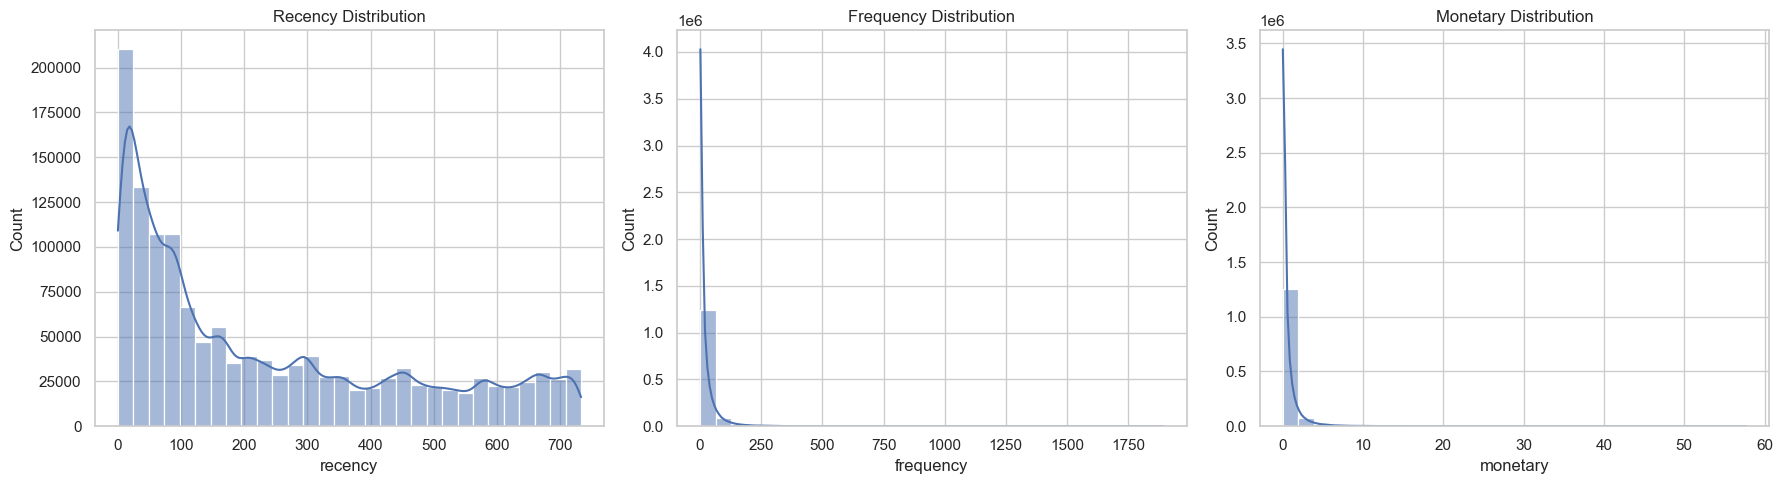

In [92]:
# Analyze RFM Distributions

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(rfm['recency'], bins=30, ax=axes[0], kde=True)
axes[0].set_title('Recency Distribution')

sns.histplot(rfm['frequency'], bins=30, ax=axes[1], kde=True)
axes[1].set_title('Frequency Distribution')

sns.histplot(rfm['monetary'], bins=30, ax=axes[2], kde=True)
axes[2].set_title('Monetary Distribution')

plt.tight_layout()
plt.show()

In [93]:
# Assign scores from 1 (worst) to 5 (best)
rfm['r_score'] = pd.qcut(rfm['recency'], 5, labels=[5, 4, 3, 2, 1])  # lower recency = better
rfm['f_score'] = pd.qcut(rfm['frequency'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])
rfm['m_score'] = pd.qcut(rfm['monetary'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])

# Combine into single RFM score
rfm['rfm_score'] = rfm['r_score'].astype(str) + rfm['f_score'].astype(str) + rfm['m_score'].astype(str)
rfm.head()

,customer_id,recency,frequency,monetary,r_score,f_score,m_score,rfm_score
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,17,21,0.648983,5,4,4,544
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,76,86,2.601932,4,5,5,455
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,7,18,0.704780,5,4,4,544
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,471,2,0.060983,1,1,1,111
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,41,13,0.469695,4,3,4,434
